# SP2024-FP01-Glaciers

### Project Members:
- Nathan Sedmak
- Callum Hood-Cree
- Wade Kalh
- Finley Wolff

In [2]:
# Imports the necessary libraries for this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
from matplotlib.patches import Patch

### Importing the Data

In [3]:
# Defines the path to the data from 1993
path_93 = "../data/1993_Greenland_P3.csv"
# Read the csv file
df_93 = pd.read_csv(path_93)
# Renames each column of the dataframe to make it uniform and easier to type
df_93.rename(columns = {'LAT':'latitude', 'LON':'longitude','TIME':'time','THICK':'thickness','ELEVATION':'elevation', 'FRAME':'frame', 'SURFACE':'surface', 'BOTTOM':'bottom', 'QUALITY':'quality'}, inplace = True) 
# make the thickness column float vlaues so we can replace the negative thicknesses with nan values since its impossible to have a negative thickness
df_93['thickness'] = df_93['thickness'].astype(float)
df_93.loc[df_93['thickness'] < 0, 'thickness'] = float('nan')

In [4]:
# Defines the path to the data from 1997
path_97 = "../data/1997_Greenland_P3.csv"
# Read the csv file
df_97 = pd.read_csv(path_97)
# Renames each column of the dataframe to make it uniform and easier to type
df_97.rename(columns = {'LAT':'latitude', 'LON':'longitude','TIME':'time','THICK':'thickness','ELEVATION':'elevation', 'FRAME':'frame', 'SURFACE':'surface', 'BOTTOM':'bottom', 'QUALITY':'quality'}, inplace = True) 
# make the thickness column float vlaues so we can replace the negative thicknesses with nan values since its impossible to have a negative thickness
df_97['thickness'] = df_97['thickness'].astype(float)
df_97.loc[df_97['thickness'] < 0, 'thickness'] = float('nan')

In [5]:
# Defines the path to the data from 2001
path_01 = "../data/2001_Greenland_P3.csv"
# Read the csv file
df_01 = pd.read_csv(path_01)
# Renames each column of the dataframe to make it uniform and easier to type
df_01.rename(columns = {'LAT':'latitude', 'LON':'longitude','TIME':'time','THICK':'thickness','ELEVATION':'elevation', 'FRAME':'frame', 'SURFACE':'surface', 'BOTTOM':'bottom', 'QUALITY':'quality'}, inplace = True)
# make the thickness column float vlaues so we can replace the negative thicknesses with nan values since its impossible to have a negative thickness
df_01['thickness'] = df_01['thickness'].astype(float)
df_01.loc[df_01['thickness'] < 0, 'thickness'] = float('nan')

In [6]:
# Defines the path to the data from 2005
path_05 = "../data/Browse_2005_Greenland_TO-1.csv"
# Read the csv file
df_05 = pd.read_csv(path_05)
# Renames each column of the dataframe to make it uniform and easier to type
df_05.rename(columns = {'LAT':'latitude', 'LON':'longitude','TIME':'time','THICK':'thickness','ELEVATION':'elevation', 'FRAME':'frame', 'SURFACE':'surface', 'BOTTOM':'bottom', 'QUALITY':'quality'}, inplace = True) 
# make the thickness column float vlaues so we can replace the negative thicknesses with nan values since its impossible to have a negative thickness
df_05['thickness'] = df_05['thickness'].astype(float)
df_05.loc[df_05['thickness'] < 0, 'thickness'] = float('nan')

In [7]:
# Defines the path to the data from 2009
path_09 = "../data/Browse_2009_Greenland_TO.csv"
# Read the csv file
df_09 = pd.read_csv(path_09)
# Renames each column of the dataframe to make it uniform and easier to type
df_09.rename(columns = {'LAT':'latitude', 'LON':'longitude','TIME':'time','THICK':'thickness','ELEVATION':'elevation', 'FRAME':'frame', 'SURFACE':'surface', 'BOTTOM':'bottom', 'QUALITY':'quality'}, inplace = True)
# make the thickness column float vlaues so we can replace the negative thicknesses with nan values since its impossible to have a negative thickness
df_09['thickness'] = df_09['thickness'].astype(float)
df_09.loc[df_09['thickness'] < 0, 'thickness'] = float('nan')

In [8]:
# Defines the path to the data from 2013
path_13 = "../data/Browse_2013_Greenland_P3.csv"
# Read the csv file
df_13 = pd.read_csv(path_13)
# Renames each column of the dataframe to make it uniform and easier to type
df_13.rename(columns = {'LAT':'latitude', 'LON':'longitude','TIME':'time','THICK':'thickness','ELEVATION':'elevation', 'FRAME':'frame', 'SURFACE':'surface', 'BOTTOM':'bottom', 'QUALITY':'quality'}, inplace = True)
# make the thickness column float vlaues so we can replace the negative thicknesses with nan values since its impossible to have a negative thickness
df_13['thickness'] = df_13['thickness'].astype(float)
df_13.loc[df_13['thickness'] < 0, 'thickness'] = float('nan')

In [9]:
# Defines the path to the data from 2017
path_17 = "../data/Browse_2017_Greenland_P3.csv"
# Read the csv file
df_17 = pd.read_csv(path_17)
# Renames each column of the dataframe to make it uniform and easier to type
df_17.rename(columns = {'LAT':'latitude', 'LON':'longitude','TIME':'time','THICK':'thickness','ELEVATION':'elevation', 'FRAME':'frame', 'SURFACE':'surface', 'BOTTOM':'bottom', 'QUALITY':'quality'}, inplace = True) 
# make the thickness column float vlaues so we can replace the negative thicknesses with nan values since its impossible to have a negative thickness
df_17['thickness'] = df_17['thickness'].astype(float)
df_17.loc[df_17['thickness'] < 0, 'thickness'] = float('nan')

In [10]:
# Defines the path to the data from 2019
path_19 = "../data/Browse_2019_Greenland_P3-1.csv"
# Read the csv file
df_19 = pd.read_csv(path_19)
# Renames each column of the dataframe to make it uniform and easier to type
df_19.rename(columns = {'LAT':'latitude', 'LON':'longitude','UTCTIMESOD':'time','THICK':'thickness','ELEVATION':'elevation', 'FRAME':'frame', 'SURFACE':'surface', 'BOTTOM':'bottom', 'QUALITY':'quality'}, inplace = True) 
# make the thickness column float vlaues so we can replace the negative thicknesses with nan values since its impossible to have a negative thickness
df_19['thickness'] = df_19['thickness'].astype(float)
df_19.loc[df_19['thickness'] < 0, 'thickness'] = float('nan')

In [11]:
# Creates a single dataframe holding all of the measurements used for this project
df_all_data = pd.concat([df_93, df_97, df_01, df_05, df_09, df_13, df_17, df_19], axis=0)

In [12]:
# Prints a summary of the data in each column
df_all_data.describe()

,latitude,longitude,time,thickness,frame,surface,bottom,quality,UTCTIMESOD
count,492948.000000,492948.000000,390206.000000,492878.000000,4.929480e+05,4.929480e+05,4.929480e+05,492948.000000,102742.000000
mean,71.813966,-46.193706,52708.337916,1456.735059,2.005581e+12,6.363028e+03,7.819555e+03,0.481763,52767.360379
std,5.164350,11.530840,6898.621507,847.958094,1.011969e+10,2.910160e+05,2.910018e+05,0.536267,7560.300128
min,60.803549,-99.989875,36274.244600,0.000000,1.993062e+12,-2.687816e+06,-2.686529e+06,0.000000,33770.095000
25%,68.190792,-49.861649,47340.824675,851.485000,1.997052e+12,4.718500e+02,1.402700e+03,0.000000,46633.054450
50%,70.170318,-47.092521,52140.000000,1394.595000,2.001053e+12,5.589000e+02,1.963300e+03,0.000000,52880.061700
75%,76.848089,-39.392130,57614.293275,2035.940000,2.017042e+12,6.505300e+02,2.652370e+03,1.000000,59021.254025
max,82.967317,28.467686,83025.859300,4113.410000,2.019052e+12,1.203058e+07,1.203188e+07,3.000000,70700.513000


### Change in Mean Ice Thickness over Time

In [13]:
# Creates a list with the mean ice thickness for each year
thick_mean = []
thick_mean.append(df_93.thickness.mean())
thick_mean.append(df_97.thickness.mean())
thick_mean.append(df_01.thickness.mean())
thick_mean.append(df_05.thickness.mean())
thick_mean.append(df_09.thickness.mean())
thick_mean.append(df_13.thickness.mean())
thick_mean.append(df_17.thickness.mean())
thick_mean.append(df_19.thickness.mean())
# Creates a list with labels for each year
years = ['1993', '1997', '2001', '2005', '2009', '2013', '2017', '2019']
# Calculates the standard deviation of the thickness
thick_std = np.std(thick_mean, axis=0)
# Creates variables for showing +- one standard deviation
thick_upper = thick_mean + thick_std
thick_lower = thick_mean - thick_std

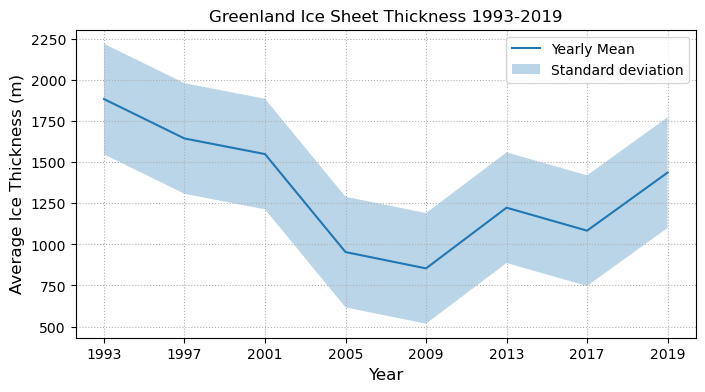

In [14]:
# Plots the mean ice sheet thickness and one standard deviation above and below
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(years, thick_mean, label='Yearly Mean')
ax.fill_between(years, thick_lower, thick_upper, alpha=0.3, label='Standard deviation')
ax.set_title('Greenland Ice Sheet Thickness 1993-2019')
ax.set_ylabel('Average Ice Thickness (m)', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.grid(ls='dotted')
ax.legend()

# Saves the plot as a png
plt.savefig('../figures/average_thickness.png', dpi = 200)

# Displays the plot
plt.show()

### Measurement Locations

In [15]:
# Gathers latitude and longitude from each location data was collected by year
# In a seperate cell to reduce run time of the cartopy map since there are over 80000 data points per lat and lon
lat93 = df_93.latitude
lon93 = df_93.longitude
lat97 = df_97.latitude
lon97 = df_97.longitude
lat01 = df_01.latitude
lon01 = df_01.longitude
lon05 = df_05.longitude
lat05 = df_05.latitude
lon09 = df_09.longitude
lat09 = df_09.latitude
lon13 = df_13.longitude
lat13 = df_13.latitude
lon17 = df_17.longitude
lat17 = df_17.latitude
lon19 = df_19.longitude
lat19 = df_19.latitude

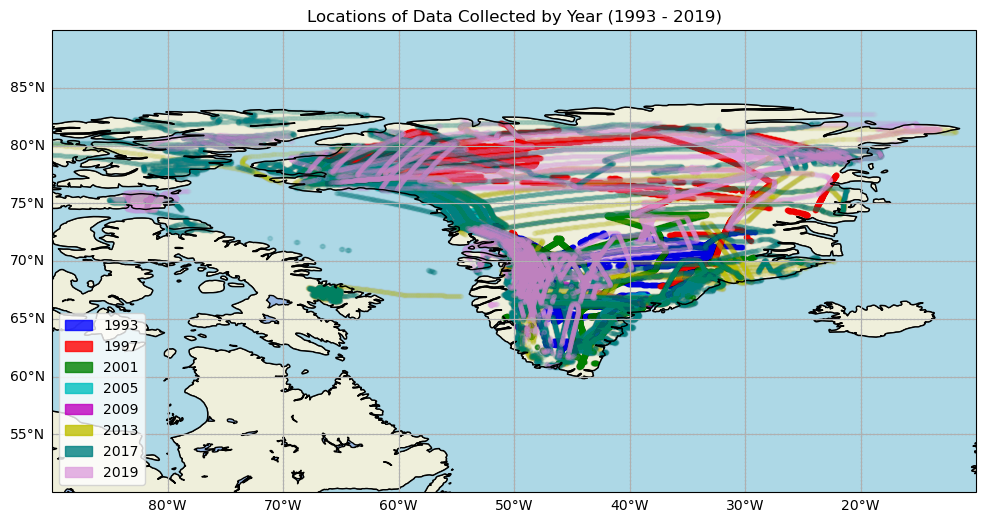

In [16]:
# Creates a map of the locations that the data was collected
# Sets bounds of the latitude and longitude based on the readme file provided
extent = [-90, -10, 50, 90] 
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])
projection = ccrs.PlateCarree()
plt.figure(figsize=(12, 6))
ax = plt.axes(projection= projection)
ax.set_extent(extent)

# Adds features to the map
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue')
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')

# Plots the locations at which measurements were taken
a = 0.03
ax.scatter(lon93,lat93, label='93', color ='b', transform = projection,  marker ='.', alpha = a)
ax.scatter(lon97,lat97, label='97', color = 'r', marker ='.', alpha = a)
ax.scatter(lon01,lat01, label='01', color ='g',  marker ='.', alpha = a)
ax.scatter(lon05,lat05, label='05', color='c', marker ='.', alpha = a)
ax.scatter(lon09,lat09, label='09', color='m',  marker ='.', alpha = a)
ax.scatter(lon13,lat13, label='13', color='y', marker ='.', alpha = a)
ax.scatter(lon17,lat17, label='17', color='teal', marker ='.', alpha = a)
ax.scatter(lon19,lat19, label='19', color='plum', marker ='.', alpha = a)

# Adds gridlines and labels for latitude and longitude
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='dotted')
gl.top_labels = False
gl.right_labels = False
ax.gridlines()

# Uses Matplotlib patch to make the legend visible since we used such a low alpha value in the scatters
b = .8
legend_patches = [Patch(color='b', alpha=b, label='1993'), 
                  Patch(color='r', alpha=b, label='1997'),
                  Patch(color='g', alpha=b, label='2001'),
                  Patch(color='c', alpha=b, label='2005'), 
                  Patch(color='m', alpha=b, label='2009'),
                  Patch(color='y', alpha=b, label='2013'),  
                  Patch(color='teal', alpha=b, label='2017'), 
                  Patch(color='plum', alpha=b, label='2019')] 
plt.legend(handles=legend_patches)
plt.title('Locations of Data Collected by Year (1993 - 2019)')

# Saves the plot as a png
plt.savefig('../figures/measurement_locations.png', dpi = 200)

# Displays the plot
plt.show()

### Thickness Changes Between 1993 and 2017

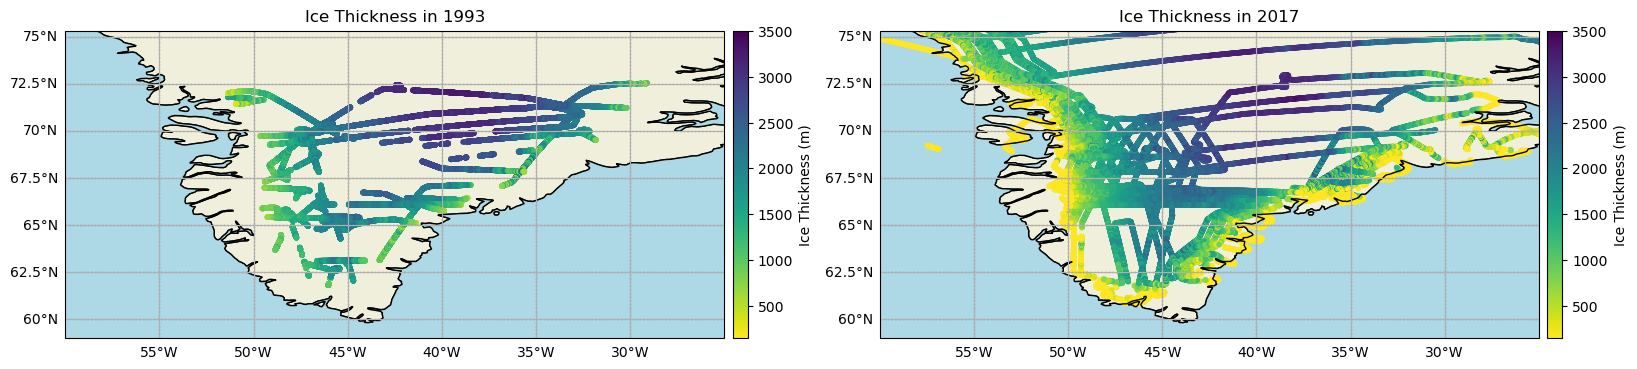

In [17]:
# Creates a figure and axes for this plot
# Uses the PlateCarree projection 
fig, ax = plt.subplots(1,2, subplot_kw={'projection': ccrs.PlateCarree()})
ax0, ax1 = ax.flatten()

# Changes the size of the figure
fig.set_figheight(2.75)
fig.set_figwidth(16)

# Defines a variable for the extent of both plots
gradient_extent = [-60, -25, 59, 75]

# Sets the thickness boundaries for both plots
thickmin = 150
thickmax = 3500

# Creates a scatter plot with a color gradient for the measurements from 1993
im93 = ax0.scatter(lon93, lat93, c = df_93.thickness, marker = ".", clim = (thickmin,thickmax), cmap = 'viridis_r')
fig.colorbar(im93, ax=ax0, label = 'Ice Thickness (m)', pad = 0.01)
ax0.set_title('Ice Thickness in 1993')

# Creates a scatter plot with a color gradient for the measurements from 2019
im19 = ax1.scatter(lon17, lat17, c = df_17.thickness, marker = ".", clim = (thickmin,thickmax), cmap = 'viridis_r')
fig.colorbar(im19, ax=ax1, label = 'Ice Thickness (m)', pad = 0.01)
ax1.set_title('Ice Thickness in 2017')

# Adds gridlines to both plots
gl0 = ax0.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=1, linestyle='dotted')
gl0.top_labels = False
gl0.right_labels = False
ax0.gridlines()
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=1, linestyle='dotted')
gl1.top_labels = False
gl1.right_labels = False
ax1.gridlines()

# Adds cartopy features to the plot for 1993
ax0.set_extent(gradient_extent)
ax0.add_feature(cartopy.feature.LAND, edgecolor='black')
ax0.add_feature(cartopy.feature.OCEAN, facecolor='lightblue')
ax0.add_feature(cartopy.feature.COASTLINE)
ax0.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='gray')
ax0.add_feature(cartopy.feature.LAKES, edgecolor='black')

# Adds cartopy features to the plot for 2017
ax1.set_extent(gradient_extent)
ax1.add_feature(cartopy.feature.LAND, edgecolor='black')
ax1.add_feature(cartopy.feature.OCEAN, facecolor='lightblue')
ax1.add_feature(cartopy.feature.COASTLINE)
ax1.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='gray')
ax1.add_feature(cartopy.feature.LAKES, edgecolor='black')

# Sets the spacing between the subplots
fig.tight_layout(pad = -2.75)

# Saves the plot as a png
plt.savefig('../figures/thickness_heatmap.png', dpi = 200,bbox_inches='tight')

# Displays the plot
plt.show()

### Elevation vs Thickness Plot

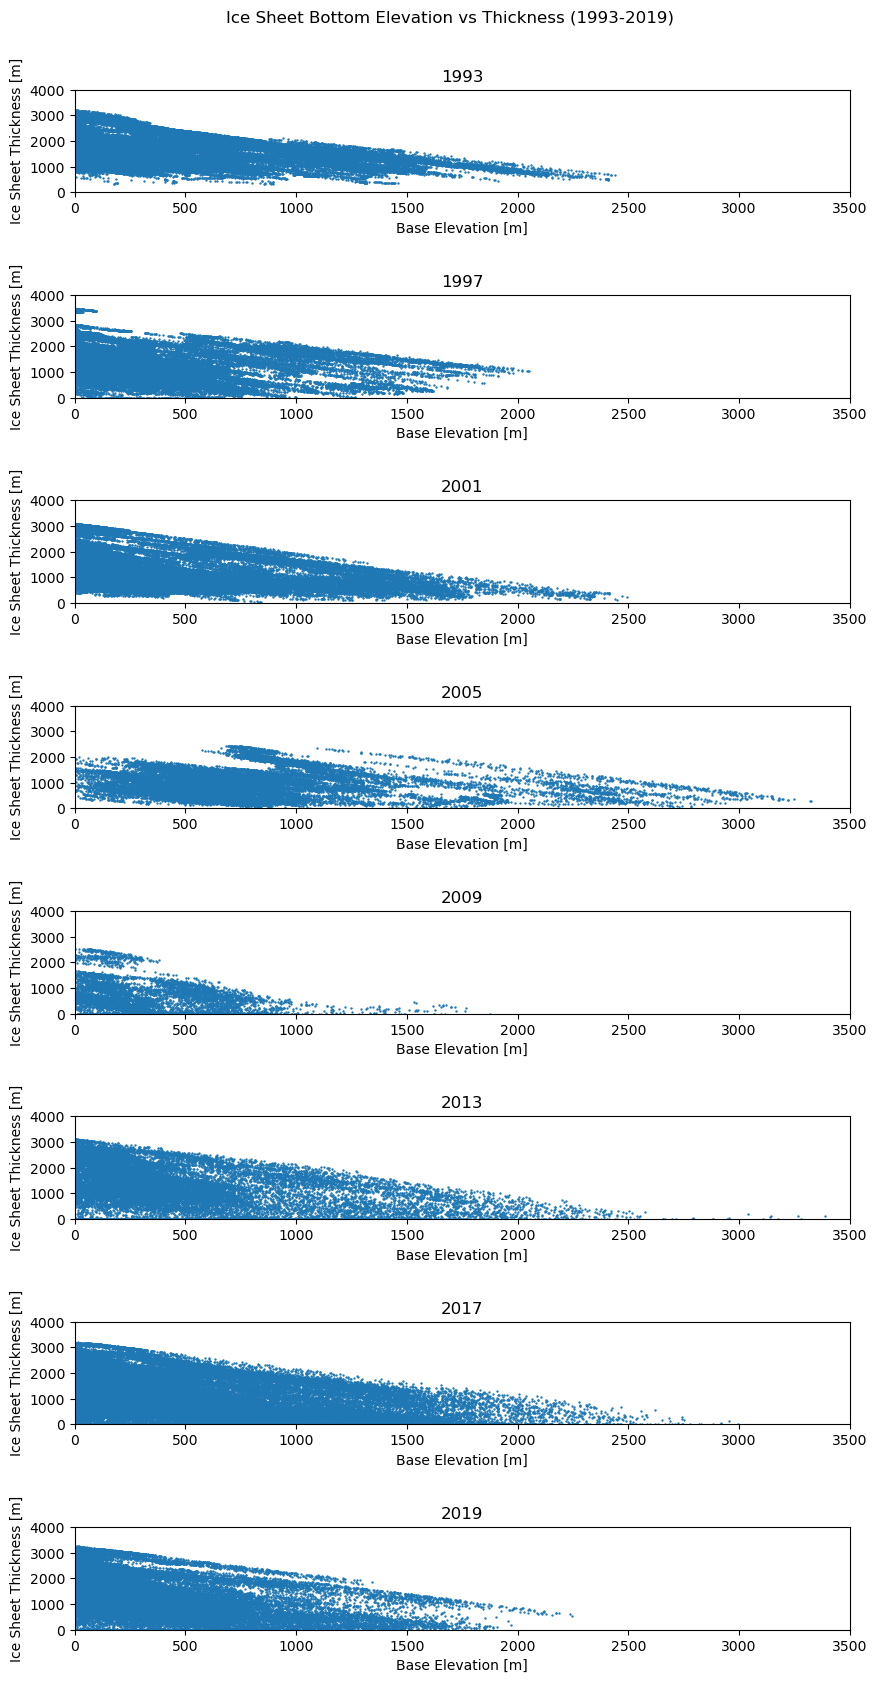

In [18]:
# Creates the figure for this plot and adjusts the subplot spacing
fig, (y93,y97,y01,y05,y09,y13,y17,y19) = plt.subplots(8, figsize = (10,20))
plt.subplots_adjust(hspace=1)

# Adds a title for the overall plot
plt.suptitle('Ice Sheet Bottom Elevation vs Thickness (1993-2019)', y = .92)


# Plots the data from 1993 and adds labels
y93.scatter(df_93['elevation'].astype(float)-df_93['bottom'],df_93['thickness'],s=0.5)
y93.xaxis.set_ticks(np.arange(0, 6001, 500))
y93.yaxis.set_ticks(np.arange(0, 4001, 1000))
y93.axis(xmin=0, xmax=3500,ymin=0,ymax=4000)
y93.set_title('1993')
y93.set_ylabel('Ice Sheet Thickness [m]')
y93.set_xlabel('Base Elevation [m]')

# Plots the data from 1997 and adds labels
y97.scatter(df_97['elevation'].astype(float)-df_97['bottom'],df_97['thickness'],s=0.5)
y97.xaxis.set_ticks(np.arange(0, 6001, 500))
y97.yaxis.set_ticks(np.arange(0, 4001, 1000))
y97.axis(xmin=0, xmax=3500,ymin=0,ymax=4000)
y97.set_title('1997')
y97.set_ylabel('Ice Sheet Thickness [m]')
y97.set_xlabel('Base Elevation [m]')

# Plots the data from 2001 and adds labels
y01.scatter(df_01['elevation'].astype(float)-df_01['bottom'],df_01['thickness'],s=0.5)
y01.xaxis.set_ticks(np.arange(0, 6001, 500))
y01.yaxis.set_ticks(np.arange(0, 4001, 1000))
y01.axis(xmin=0, xmax=3500,ymin=0,ymax=4000)
y01.set_title('2001')
y01.set_ylabel('Ice Sheet Thickness [m]')
y01.set_xlabel('Base Elevation [m]')

# Plots the data from 2005 and adds labels
y05.scatter(df_05['elevation'].astype(float)-df_05['bottom'],df_05['thickness'],s=0.5)
y05.xaxis.set_ticks(np.arange(0, 6001, 500))
y05.yaxis.set_ticks(np.arange(0, 4001, 1000))
y05.axis(xmin=0, xmax=3500,ymin=0,ymax=4000)
y05.set_title('2005')
y05.set_ylabel('Ice Sheet Thickness [m]')
y05.set_xlabel('Base Elevation [m]')

# Plots the data from 2009 and adds labels
y09.scatter(df_09['elevation'].astype(float)-df_09['bottom'],df_09['thickness'],s=0.5)
y09.xaxis.set_ticks(np.arange(0, 6001, 500))
y09.yaxis.set_ticks(np.arange(0, 4001, 1000))
y09.axis(xmin=0, xmax=3500,ymin=0,ymax=4000)
y09.set_title('2009')
y09.set_ylabel('Ice Sheet Thickness [m]')
y09.set_xlabel('Base Elevation [m]')

# Plots the data from 2013 and adds labels
y13.scatter(df_13['elevation'].astype(float)-df_13['bottom'],df_13['thickness'],s=0.5)
y13.xaxis.set_ticks(np.arange(0, 6001, 500))
y13.yaxis.set_ticks(np.arange(0, 4001, 1000))
y13.axis(xmin=0, xmax=3500,ymin=0,ymax=4000)
y13.set_title('2013')
y13.set_ylabel('Ice Sheet Thickness [m]')
y13.set_xlabel('Base Elevation [m]')

# Plots the data from 2017 and adds labels
y17.scatter(df_17['elevation'].astype(float)-df_17['bottom'],df_17['thickness'],s=0.5)
y17.xaxis.set_ticks(np.arange(0, 6001, 500))
y17.yaxis.set_ticks(np.arange(0, 4001, 1000))
y17.axis(xmin=0, xmax=3500,ymin=0,ymax=4000)
y17.set_title('2017')
y17.set_ylabel('Ice Sheet Thickness [m]')
y17.set_xlabel('Base Elevation [m]')

# Plots the data from 2019 and adds labels
y19.scatter(df_19['elevation'].astype(float)-df_19['bottom'],df_19['thickness'],s=0.5)
y19.xaxis.set_ticks(np.arange(0, 6001, 500))
y19.yaxis.set_ticks(np.arange(0, 4001, 1000))
y19.axis(xmin=0, xmax=3500,ymin=0,ymax=4000)
y19.set_title('2019')
y19.set_ylabel('Ice Sheet Thickness [m]')
y19.set_xlabel('Base Elevation [m]')

# Saves the plot as a png
plt.savefig('../figures/elevation_vs_thickness.png', dpi = 200)

### Latitude vs Ice Thickness

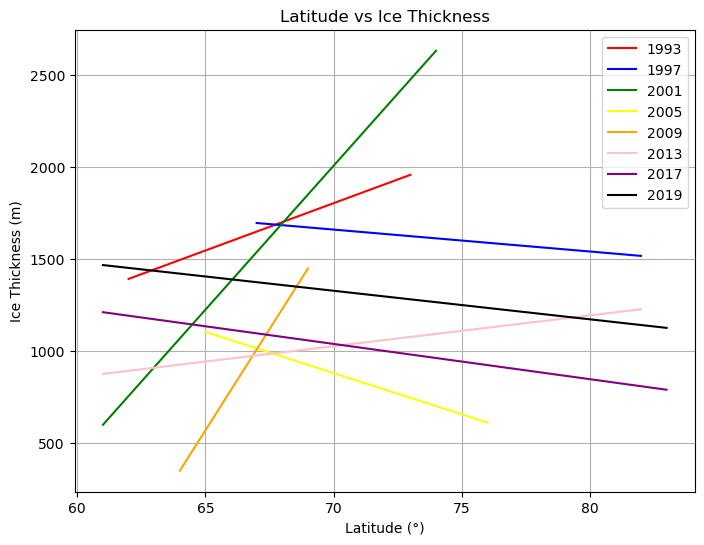

In [19]:
plt.figure(figsize=(8, 6))

#round latitude values so latitude values can be grouped and averaged
df_93['latitude'] = df_93['latitude'].round() 
df_97['latitude'] = df_97['latitude'].round()
df_01['latitude'] = df_01['latitude'].round()
df_05['latitude'] = df_05['latitude'].round()
df_09['latitude'] = df_09['latitude'].round()
df_13['latitude'] = df_13['latitude'].round()
df_17['latitude'] = df_17['latitude'].round()
df_19['latitude'] = df_19['latitude'].round()

#groups thickness values with rounded latitude values then takes mean of each grouping and creates new index because there is less values
avg_thickness_93 = df_93.groupby('latitude')['thickness'].mean().reset_index() 
avg_thickness_97 = df_97.groupby('latitude')['thickness'].mean().reset_index() 
avg_thickness_01 = df_01.groupby('latitude')['thickness'].mean().reset_index() 
avg_thickness_05 = df_05.groupby('latitude')['thickness'].mean().reset_index() 
avg_thickness_09 = df_09.groupby('latitude')['thickness'].mean().reset_index() 
avg_thickness_13 = df_13.groupby('latitude')['thickness'].mean().reset_index() 
avg_thickness_17 = df_17.groupby('latitude')['thickness'].mean().reset_index() 
avg_thickness_19 = df_19.groupby('latitude')['thickness'].mean().reset_index() 

#get lines of best fit with np.polyfit and slope intercept equation
slope_93, intercept_93 = np.polyfit(avg_thickness_93['latitude'], avg_thickness_93['thickness'], 1)
best_fit_93 = slope_93 * avg_thickness_93['latitude'] + intercept_93

slope_97, intercept_97 = np.polyfit(avg_thickness_97['latitude'], avg_thickness_97['thickness'], 1)
best_fit_97 = slope_97 * avg_thickness_97['latitude'] + intercept_97

slope_01, intercept_01 = np.polyfit(avg_thickness_01['latitude'], avg_thickness_01['thickness'], 1)
best_fit_01 = slope_01 * avg_thickness_01['latitude'] + intercept_01

slope_05, intercept_05 = np.polyfit(avg_thickness_05['latitude'], avg_thickness_05['thickness'], 1)
best_fit_05 = slope_05 * avg_thickness_05['latitude'] + intercept_05

slope_09, intercept_09 = np.polyfit(avg_thickness_09['latitude'], avg_thickness_09['thickness'], 1)
best_fit_09 = slope_09 * avg_thickness_09['latitude'] + intercept_09

slope_13, intercept_13 = np.polyfit(avg_thickness_13['latitude'], avg_thickness_13['thickness'], 1)
best_fit_13 = slope_13 * avg_thickness_13['latitude'] + intercept_13

slope_17, intercept_17 = np.polyfit(avg_thickness_17['latitude'], avg_thickness_17['thickness'], 1)
best_fit_17 = slope_17 * avg_thickness_17['latitude'] + intercept_17

slope_19, intercept_19 = np.polyfit(avg_thickness_19['latitude'], avg_thickness_19['thickness'], 1)
best_fit_19 = slope_19 * avg_thickness_19['latitude'] + intercept_19


#plot lines of best fit
plt.plot(avg_thickness_93['latitude'],best_fit_93, color='red', label='1993')
plt.plot(avg_thickness_97['latitude'],best_fit_97, color='blue', label='1997')
plt.plot(avg_thickness_01['latitude'],best_fit_01, color='green', label='2001')
plt.plot(avg_thickness_05['latitude'],best_fit_05, color='yellow', label='2005')
plt.plot(avg_thickness_09['latitude'],best_fit_09, color='orange', label='2009')
plt.plot(avg_thickness_13['latitude'],best_fit_13, color='pink', label='2013')
plt.plot(avg_thickness_17['latitude'],best_fit_17, color='purple', label='2017')
plt.plot(avg_thickness_19['latitude'],best_fit_19, color='black', label='2019')

plt.legend()
plt.title('Latitude vs Ice Thickness')
plt.xlabel('Latitude (°)')
plt.ylabel('Ice Thickness (m)')
plt.grid(True)
plt.show()